# **Assignment 3: DBSCAN**
## **Group 2:**
* Karyl Grasparil
* Mariah Quinquito
* Yanna Polonia

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Data Steps

## Loading patient_priority.csv  into a pandas dataframe named data and printing its header

In [2]:
data = pd.read_csv('patient_priority.csv')
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  triage  
0   never smoked  yellow  
1   never smoked  orange  
2   never smoked  yellow  
3   never smoked  orange  
4   never smoked  yellow

## Dropping the 'triage' column and print out the header

In [3]:
data.drop(columns = ['triage'], inplace = True)
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

## Summarizing data, explaining and making observations about each column in the dataset

In [4]:
data.describe()

Unnamed: 0          age       gender  chest pain type  blood pressure  \
count  6962.000000  6962.000000  6961.000000      6962.000000     6962.000000   
mean   2011.954180    57.450014     0.531964         0.529015      109.629991   
std    1560.966466    11.904948     0.499013         1.253791       21.534852   
min       0.000000    28.000000     0.000000         0.000000       60.000000   
25%     604.000000    48.000000     0.000000         0.000000       92.000000   
50%    1628.500000    56.000000     1.000000         0.000000      111.000000   
75%    3368.750000    66.000000     1.000000         0.000000      127.000000   
max    5109.000000    82.000000     1.000000         4.000000      165.000000   

       cholesterol  max heart rate  exercise angina  plasma glucose  \
count  6962.000000     6962.000000      6962.000000     6962.000000   
mean    184.711290      163.502442         0.061764       98.394283   
std      32.010359       15.458693         0.240743       28.598084   
min     150.000000      138.000000         0.000000       55.120000   
25%     164.000000      150.000000         0.000000       78.707500   
50%     179.000000      163.000000         0.000000       93.000000   
75%     192.000000      177.000000         0.000000      111.632500   
max     294.000000      202.000000         1.000000      199.000000   

       skin_thickness      insulin          bmi  diabetes_pedigree  \
count     6962.000000  6962.000000  6962.000000        6962.000000   
mean        56.813416   111.091640    27.190908           0.467386   
std         22.889316    17.470033     7.362886           0.102663   
min         21.000000    81.000000    10.300000           0.078000   
25%         36.000000    97.000000    21.800000           0.467386   
50%         55.000000   111.000000    26.200000           0.467386   
75%         77.000000   125.000000    31.000000           0.467386   
max         99.000000   171.000000    66.800000           2.420000   

       hypertension  heart_disease  
count   6962.000000    6962.000000  
mean       0.071531       0.039500  
std        0.257729       0.194796  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        1.000000       1.000000

<table>
<tr><tr><th><th style="text-align:center">Feature<th style="text-align:center">Kaggle Description<th style="text-align:center">Observations<tr><tr>
<tr><td><td style="text-align:center">Unnamed:0<td style="text-align:left">Patients' sequence<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is disperse<td>
<tr><td><td style="text-align:center">age<td style="text-align:left">Age of each patient<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse, partially right-skewed<td>
<tr><td><td style="text-align:center">gender<td style="text-align:left">Gender of each patient<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse<td>
<tr><tr><tr><td><td style="text-align:center">chest pain type<td style="text-align:left">Chest pain type patient has<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse<td>
<tr><td><td style="text-align:center">blood preassure<td style="text-align:left">According to <a href='https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure'>Cleveland Clinic</a> the measurement of the pressure or force of blood pushing against blood vessel walls. <td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse<td>
<tr><td><td style="text-align:center">cholesterol<td style="text-align:left">According to <a href='https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Cholesterol%20is%20a%20waxy%20substance,deposits%20in%20your%20blood%20vessels.'>Mayo Clinics</a>   cholesterol is a waxy substance found in your blood<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data partially disperse<td>
<tr><td><td style="text-align:center">max heart rate<td style="text-align:left">According to <a href='https://www.polar.com/blog/calculate-maximum-heart-rate-running/?srsltid=AfmBOoqGAp3IKDCSaJCNiyOpXOowSBLG8NBzXMVNjebEKs_uhMQDfBrl'>Polar</a> max heart rate it’s the highest number of beats per minute your heart can pump under maximum stress<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse<td>
<tr><tr><tr><td><td style="text-align:center">exercise angina<td style="text-align:left">According to <a href='https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=Stable%20angina.&text=It%20usually%20happens%20during%20activity,previous%20episodes%20of%20chest%20pain.'>Mayo Clinic</a> exercise angina refers to chest pain or discomfort that occurs during physical activity or exertion<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the higher end<td>
<tr><td><td style="text-align:center">plasma glucose<td style="text-align:left">Acoording to <a href='https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/'>University of California San Francisco Diabetes Teaching Center</a> plama glusose refers to how much sugar/glucose you have circulating in your blood<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and right skewed<td>
<tr><td><td style="text-align:center">skin_thickness<td style="text-align:left">According to <a href='https://www.ncbi.nlm.nih.gov/books/NBK470464/'>Hani Yousef1, Mandy Alhajj, Adegbenro O. Fakoya3 and Sandeep Sharma - National Center for Biotechnology Information</a> skin thickness varies by body region and is influenced by the thickness of the epidermal and dermal layers<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is disperse and right-skewed<td>
<tr><td><td style="text-align:center">insulin<td style="text-align:left">According to <a href='https://kidshealth.org/en/parents/insulin.html#:~:text=Insulin%20is%20a%20hormone%20that,or%20stored%20for%20future%20use'>KidsHealth</a> insulin is a hormone that lowers the level of glucose (a type of sugar) in the blood<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">bmi<td style="text-align:left">According to <a href='https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm'>National Heart, Lung and Blood Institute</a> Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and right-skewed<td>
<tr><td><td style="text-align:center">diabetes_pedigree<td style="text-align:left">According to <a href='https://rpubs.com/EsterN/1088994'>RPubs</a> diabetes pedigree indicates the function which scores likelihood of diabetes based on family history<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">hypertension<td style="text-align:left">According to <a href='https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure'>Cleveland Clinic</a> high blood pressure or hypertension is when the force of blood pushing against your artery walls is consistently too high<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and right-skewed<td>
<tr><tr><tr><td><td style="text-align:center">heart_disease<td style="text-align:left">According to <a href='https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Heart%20disease%20describes%20a%20range,with%2C%20called%20congenital%20heart%20defects'>Mayo Clinc</a> heart disease describes a range of conditions that affect the heart<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and right-skewed<td>
</table>

## Verifying the data type of each entry and if there are any missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
Unnamed: 0           6962 non-null int64
age                  6962 non-null float64
gender               6961 non-null float64
chest pain type      6962 non-null float64
blood pressure       6962 non-null float64
cholesterol          6962 non-null float64
max heart rate       6962 non-null float64
exercise angina      6962 non-null float64
plasma glucose       6962 non-null float64
skin_thickness       6962 non-null float64
insulin              6962 non-null float64
bmi                  6962 non-null float64
diabetes_pedigree    6962 non-null float64
hypertension         6962 non-null float64
heart_disease        6962 non-null float64
Residence_type       6962 non-null object
smoking_status       6962 non-null object
dtypes: float64(14), int64(1), object(2)
memory usage: 924.7+ KB


In [6]:
# Verifying features values when gender is NaN
data[data['gender'].isnull()]

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
4968        3116  72.0     NaN              0.0            85.0        160.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
4968           178.0              0.0          143.33            87.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
4968    116.0  22.4           0.467386           0.0            0.0   

     Residence_type   smoking_status  
4968          Rural  formerly smoked

## Handling missing values

In [7]:
# As we have in gender as possible values: [1.0, 0.0, NaN], going for the most frequent value to replace the NaN
# Extracting unique gender values and their count
unique, count = np.unique(data['gender'], return_counts = True)

# Extracting the value to replace the NaN gender value
value = unique[count == count.max()]

# Filling the NaN gender value with the first value in 'value'
data['gender'].fillna(value[0], inplace = True)

# Verifying there are no remaining missing values in data
data.isna().sum()

Unnamed: 0           0
age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

In [8]:
# Verifying the replacement of NaN gender value previously identified
data[data['Unnamed: 0'] == 3116]

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
4968        3116  72.0     1.0              0.0            85.0        160.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
4968           178.0              0.0          143.33            87.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
4968    116.0  22.4           0.467386           0.0            0.0   

     Residence_type   smoking_status  
4968          Rural  formerly smoked

## Validating if there are duplicated entries

In [9]:
data[data.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, age, gender, chest pain type, blood pressure, cholesterol, max heart rate, exercise angina, plasma glucose, skin_thickness, insulin, bmi, diabetes_pedigree, hypertension, heart_disease, Residence_type, smoking_status]
Index: []

### <span style='color:blue'>No duplicated records identified</span>

## Dropping the 'Unnamed: 0' column and print out the header as it is not longer needed anymore

In [10]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease Residence_type  \
0           0.467386           0.0            0.0          Urban   
1           0.467386           0.0            0.0          Urban   
2           0.467386           0.0            0.0          Urban   
3           0.467386           0.0            0.0          Urban   
4           0.467386           0.0            0.0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

## Using pandas.get_dummies to one-hot-encode the two columns with string data

In [11]:
# One hot encoding for values in feature Residence_type, adding the prefix 'residence' to them
endoded_residence_type = pd.get_dummies(data['Residence_type'], prefix = 'residence')
endoded_residence_type.head()

residence_Rural  residence_Urban
0                0                1
1                0                1
2                0                1
3                0                1
4                0                1

In [12]:
# One hot encoding for values in feature smoking_status, adding the prefix 'smoking_status' to them
endoded_smoking_status = pd.get_dummies(data['smoking_status'],  prefix = 'smoking_status')
endoded_smoking_status.head()

smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            1                      0

In [13]:
# Adding encoded values to data
data = data.join(endoded_residence_type)
data = data.join(endoded_smoking_status)
data.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin  ...  \
0              0.0           108.0            43.0     92.0  ...   
1              0.0            75.0            47.0     90.0  ...   
2              0.0            98.0            53.0    102.0  ...   
3              1.0            72.0            51.0    118.0  ...   
4              0.0           108.0            90.0     83.0  ...   

   hypertension  heart_disease  Residence_type  smoking_status  \
0           0.0            0.0           Urban    never smoked   
1           0.0            0.0           Urban    never smoked   
2           0.0            0.0           Urban    never smoked   
3           0.0            0.0           Urban    never smoked   
4           0.0            0.0           Urban    never smoked   

  residence_Rural residence_Urban  smoking_status_Unknown  \
0               0               1                       0   
1               0               1                       0   
2               0               1                       0   
3               0               1                       0   
4               0               1                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            1   
1                               0                            1   
2                               0                            1   
3                               0                            1   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 22 columns]

In [14]:
# Dropping no encoded values as they are no longer needed
data.drop(columns = ['Residence_type', 'smoking_status'], inplace = True)
data.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease  residence_Rural  \
0           0.467386           0.0            0.0                0   
1           0.467386           0.0            0.0                0   
2           0.467386           0.0            0.0                0   
3           0.467386           0.0            0.0                0   
4           0.467386           0.0            0.0                0   

   residence_Urban  smoking_status_Unknown  smoking_status_formerly smoked  \
0                1                       0                               0   
1                1                       0                               0   
2                1                       0                               0   
3                1                       0                               0   
4                1                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            1                      0

## Using seaborn.heatmap to display the correlation matrix of the features 

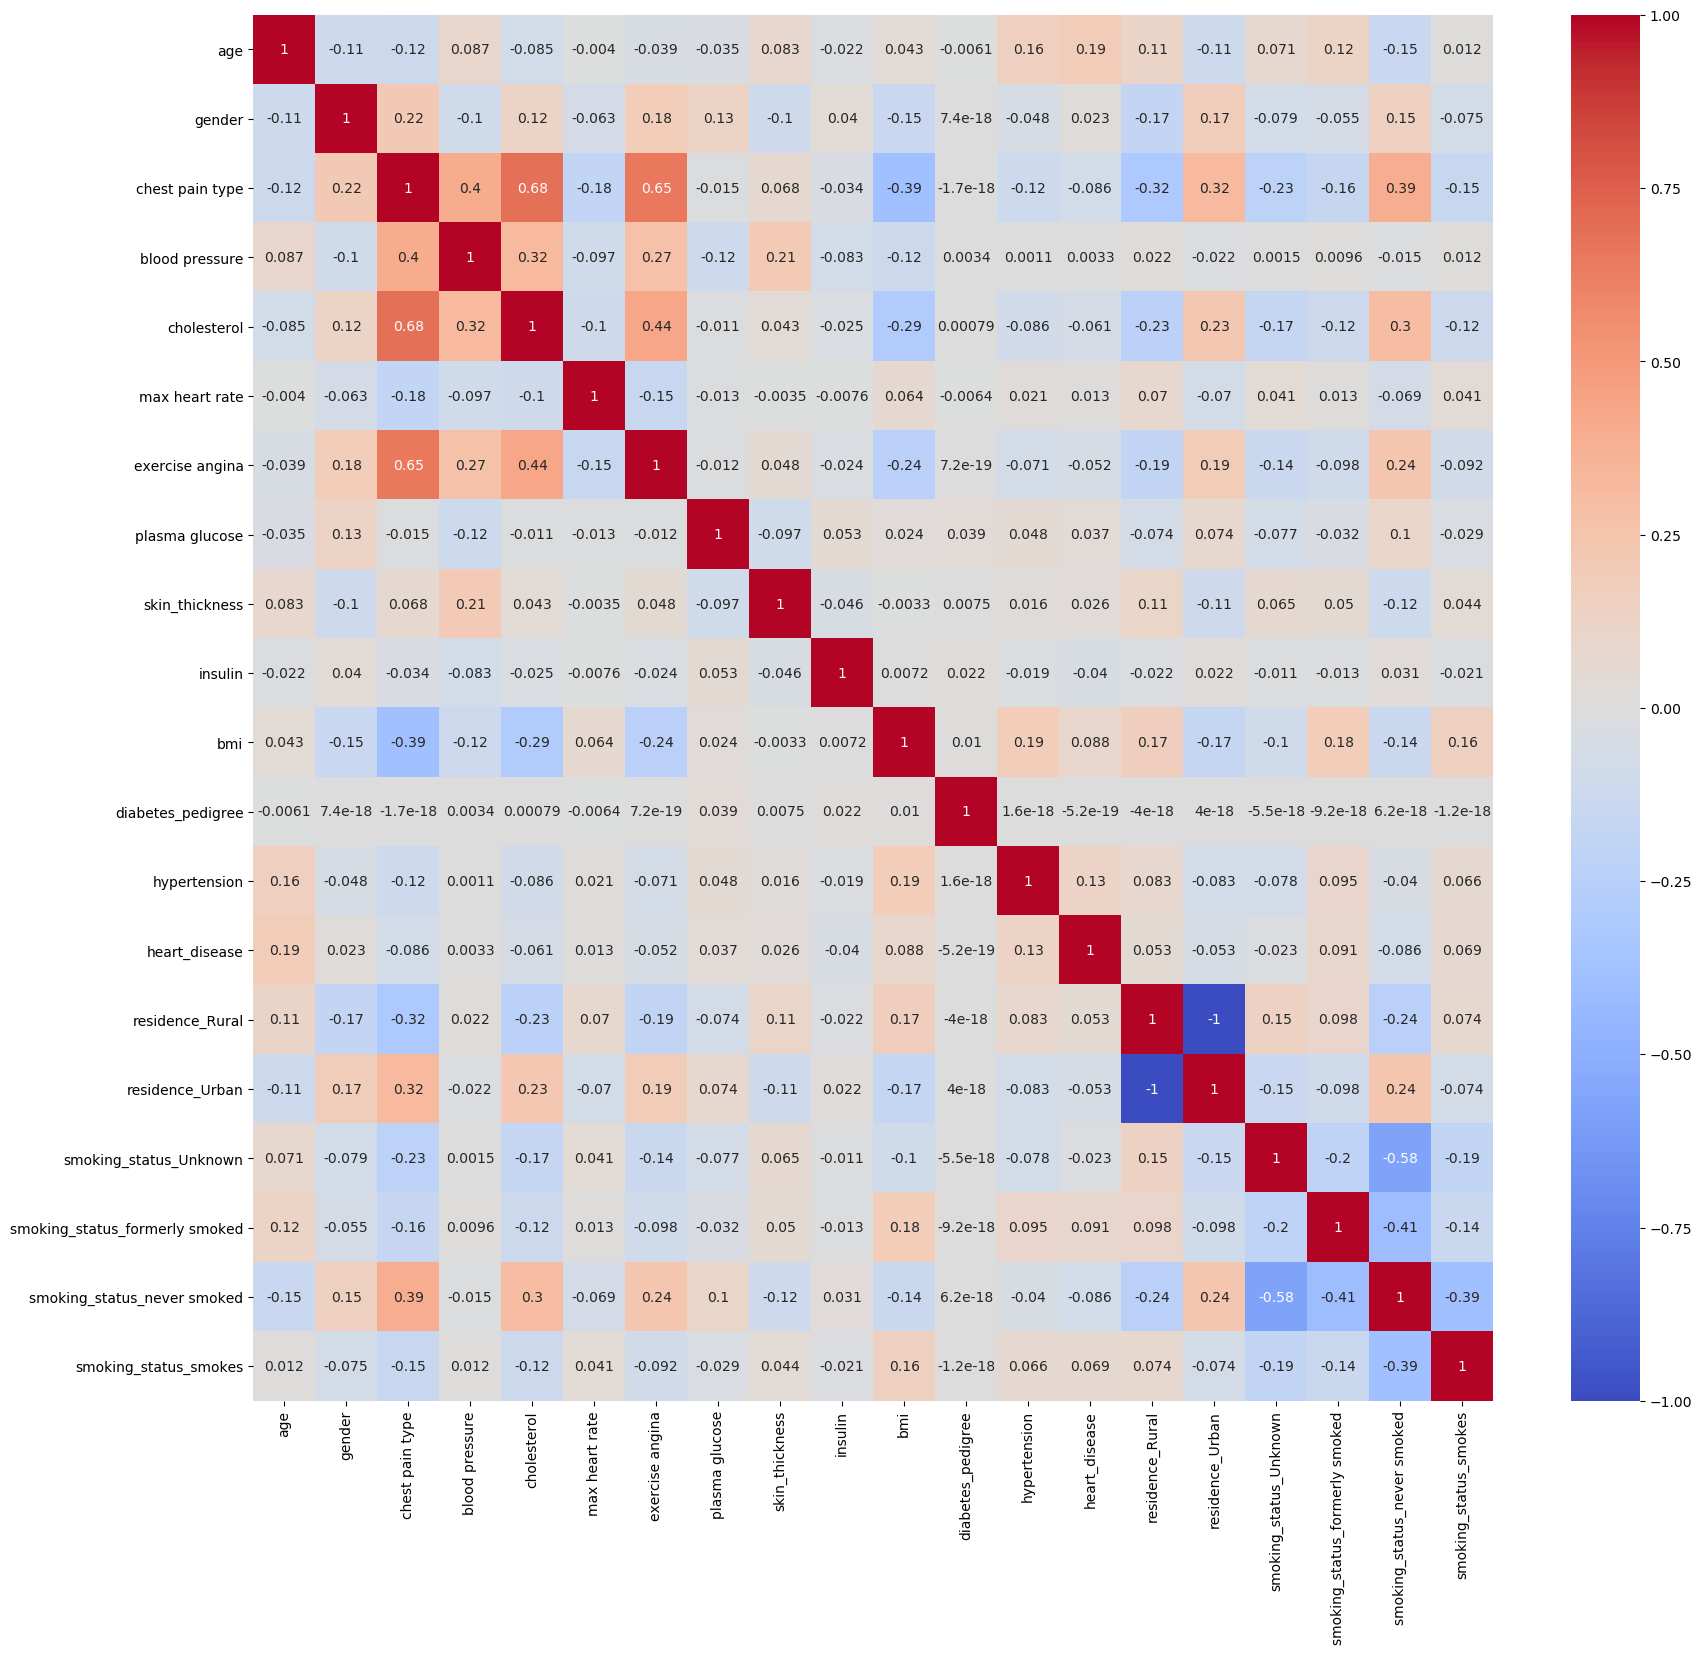

In [15]:
# Using corr function in pandas to obatin correlation of columns
# Using cmap = 'coolwarm' to differentiate high, low, and medium correlations
plt.figure(figsize = (20,18))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)
plt.show()

## Using seaborn.pairplot to generate scatterplots and histograms

<Figure size 1600x1400 with 0 Axes>

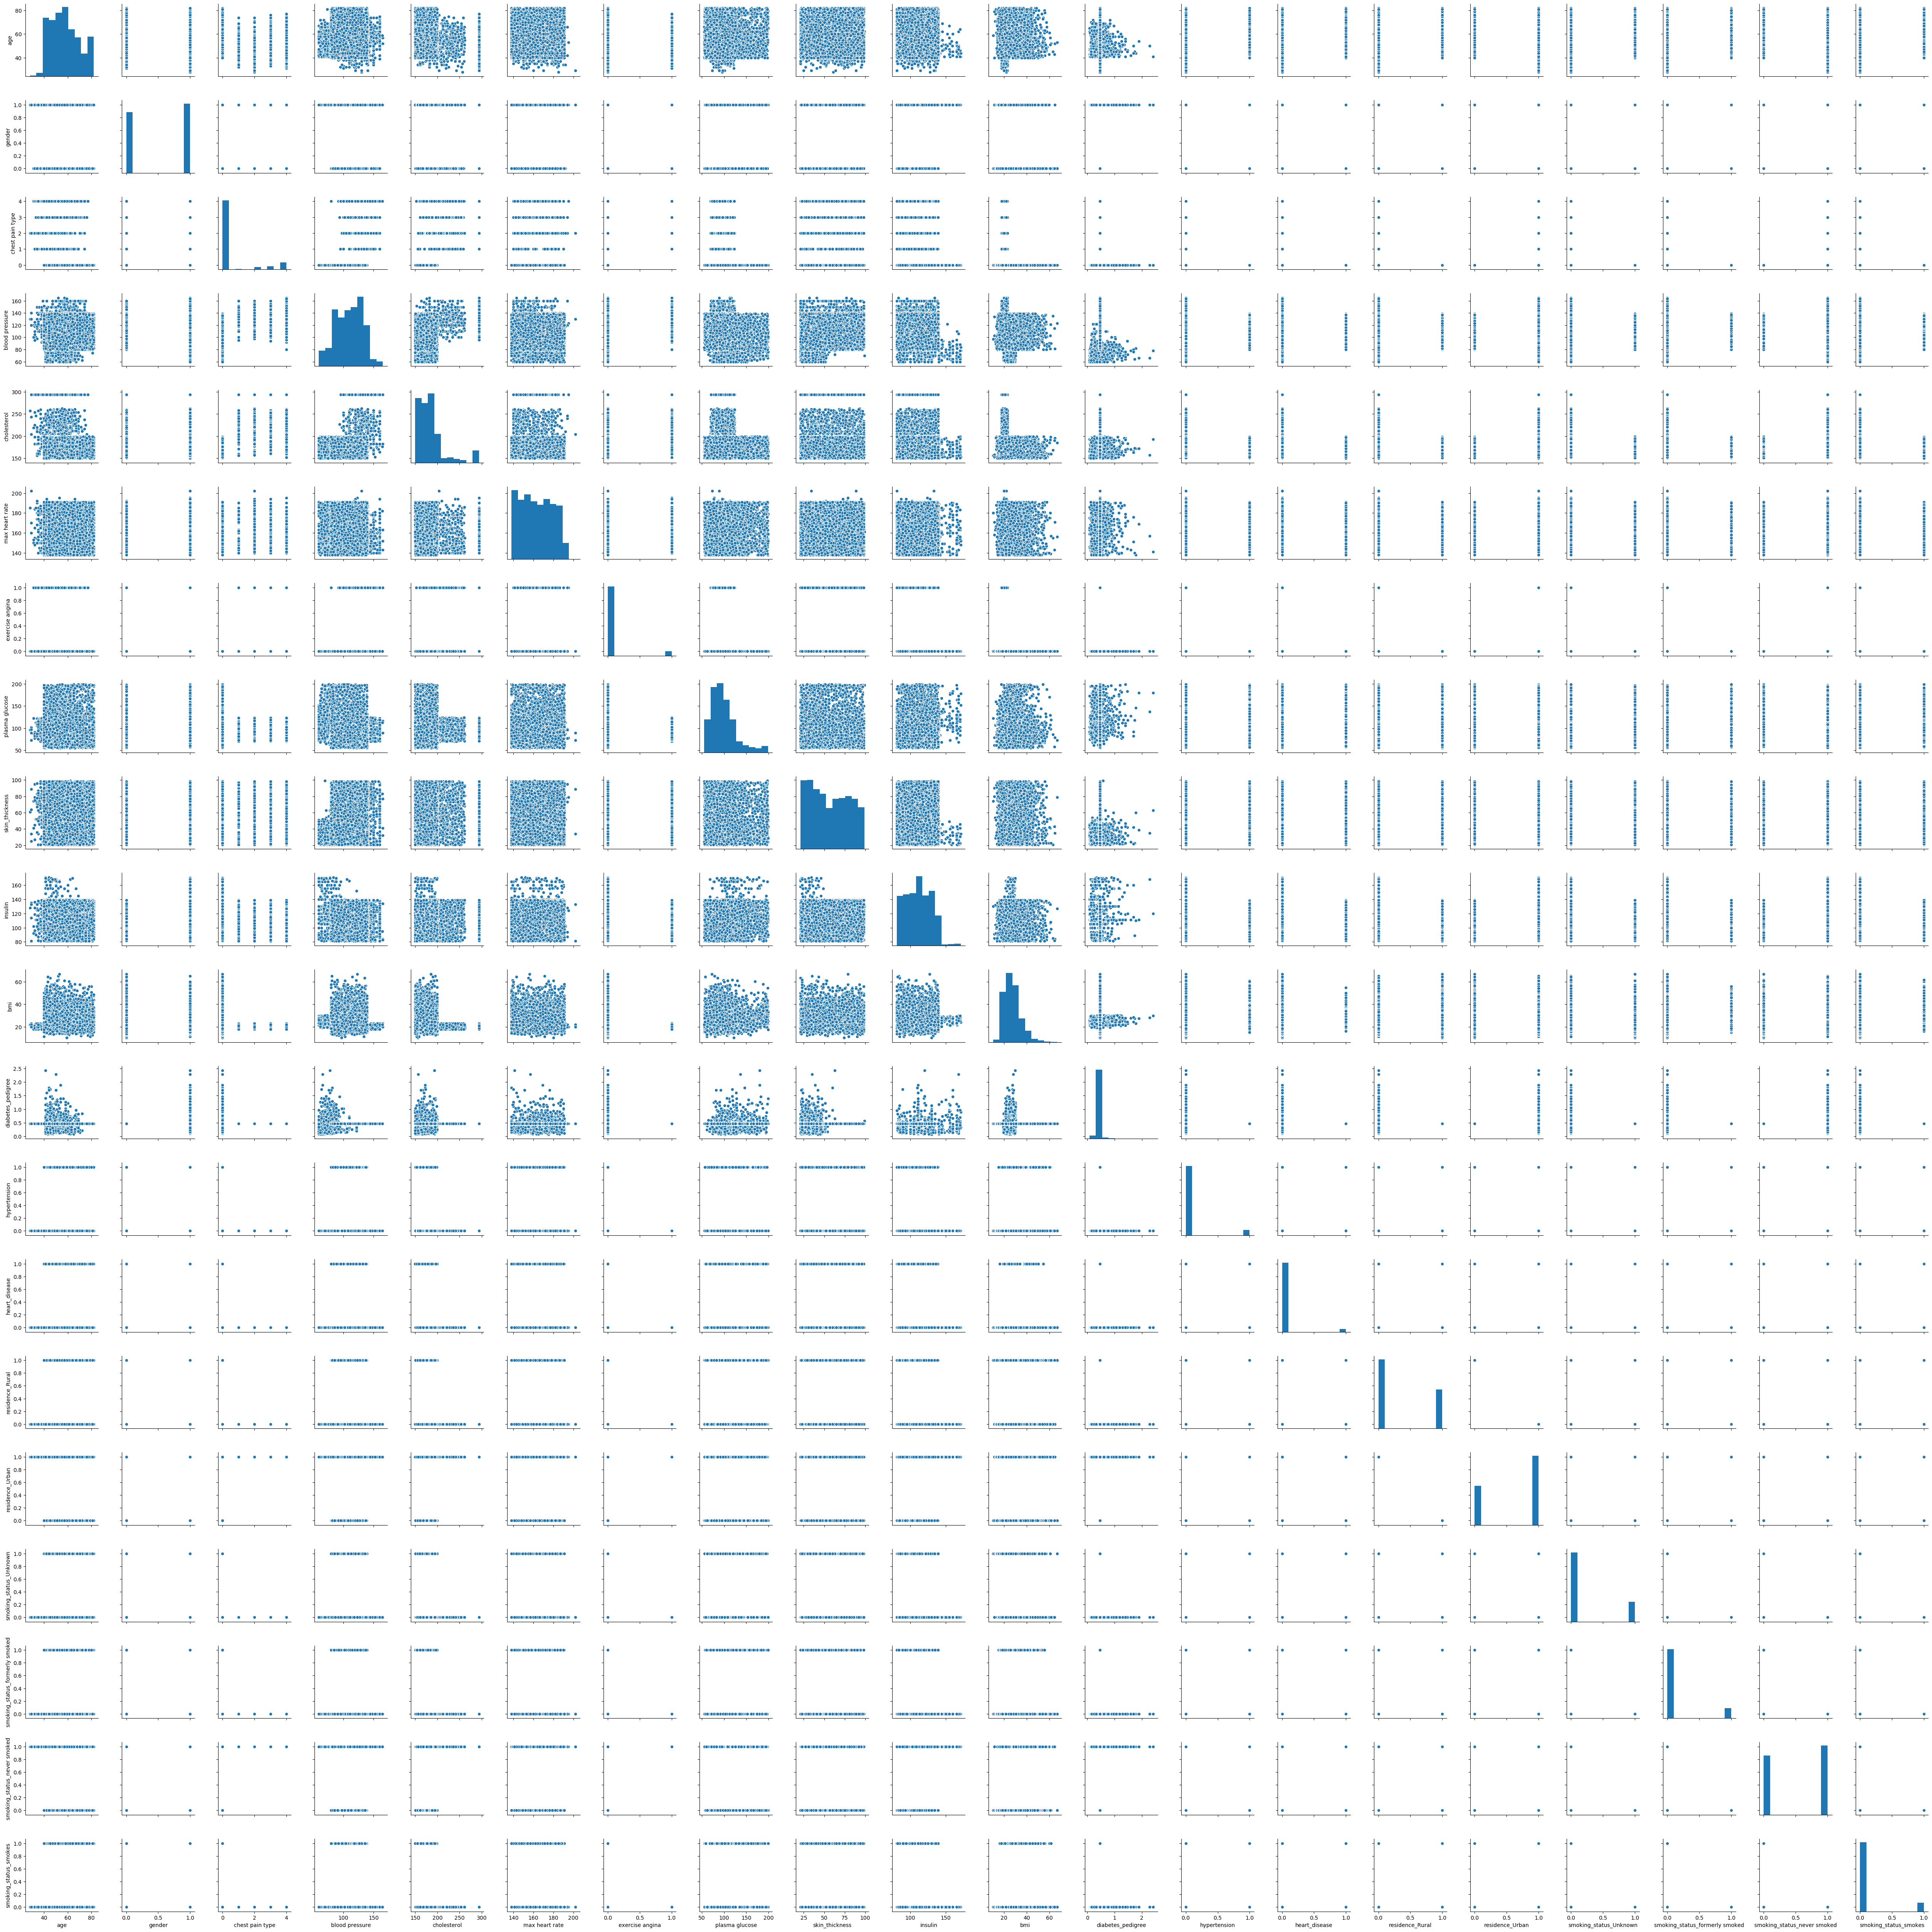

In [16]:
plt.figure(figsize = (16,14))
sns.pairplot(data)
plt.show()

### <span style='color:blue'>The highest correlation (top two) among columns are as follow:</span>

* <span style='color:blue'>chest pain type and cholesterol</span>
* <span style='color:blue'>chest pain type and exercise angina</span>

### <span style='color:blue'>The lowest correlation (top two) among columns are as follow:</span>

* <span style='color:blue'>smoking_status_unknown and smoking_status_never_smoked</span>
* <span style='color:blue'>smoking_status_never_smoked and smoking_status_formerly_smoked</span>

# 2. Modeling Steps

## Scaling the data using sklearn.preprocessing.StandardScaler and printing the header

In [17]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()
# Fitting and transforming the data
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to pandas DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data)

# Verifying scaling printing the header of scaled_df
scaled_df.head()

0    1     2         3         4        5    6         7         8   \
0  0.222222  1.0  0.50  0.761905  1.000000  0.53125  0.0  0.367528  0.282051   
1  0.388889  0.0  0.75  0.952381  0.208333  0.28125  0.0  0.138171  0.333333   
2  0.166667  1.0  0.50  0.666667  1.000000  0.28125  0.0  0.298026  0.410256   
3  0.370370  0.0  1.00  0.742857  0.444444  0.28125  1.0  0.117320  0.384615   
4  0.481481  1.0  0.75  0.857143  0.312500  0.28125  0.0  0.367528  0.884615   

         9         10        11   12   13   14   15   16   17   18   19  
0  0.122222  0.153982  0.166262  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1  0.100000  0.136283  0.166262  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
2  0.233333  0.224779  0.166262  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
3  0.411111  0.136283  0.166262  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
4  0.022222  0.189381  0.166262  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0

## Using sklearn.cluster.DBSCAN to cluster the data. 

In [18]:
# Creating at least 10 different models with different choices for hyperparameters:eps, min_samples, metric and p:
# * eps corresponds to the maximum distance between two samples for one to be considered as in the neighborhood of 
# the other, accepts float values (0.5 default value)
# * min_samples corresponds to the number of samples (or total weight) in a neighborhood for a point to be 
# considered as a core point (this includes the point itself). Accepts int values, being 5 the default one.
# * metric corresponds to the metric to use when calculating distance between instances in a feature array. Could 
# either accept string, or callable, default='euclidean'.
# * p corresponds to the power of the Minkowski metric to be used to calculate distance between points. Accepts 
# float values, default None (if None, then p = 2 (equivalent to the Euclidean distance).

# Defining list to use for the metric parameter
metric_list = ['euclidean', 'minkowski', 'euclidean',  'minkowski', 'euclidean', 'minkowski', 'euclidean', \
               'minkowski', 'minkowski', 'euclidean']
iteration_values = []
dbscan_clusters = []
silhouette_scores = []


for i in range(2, 12):
    print(f'Interation Value: {i}\n')
    
    # Generating DBSCAN clusters with different parameters combinations
    dbscan_clusters.append(DBSCAN(eps = i / 10, min_samples = i, metric = metric_list[i - 2], p = i))
    print(dbscan_clusters[i - 2])
    print(f'\nCluster Labels:\n{dbscan_clusters[i - 2].fit(scaled_data).labels_}')
    
    # Calculating silhoutte score for each cluster
    silhouette_scores.append(silhouette_score(scaled_data, dbscan_clusters[i - 2].fit_predict(scaled_data)))
    print(f'\nSilhoutte Score: {silhouette_scores[i - 2]}\n')
    
    iteration_values.append(i)

Interation Value: 2

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=2)

Cluster Labels:
[ -1  -1  -1 ... 207  -1  -1]

Silhoutte Score: -0.5918039521644997

Interation Value: 3

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='minkowski',
       metric_params=None, min_samples=3, n_jobs=None, p=3)

Cluster Labels:
[-1  8 -1 ... 24 -1 16]

Silhoutte Score: 0.006212532602205609

Interation Value: 4

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=4)

Cluster Labels:
[ 0  1  0 ... 13 -1  7]

Silhoutte Score: 0.16715773273350867

Interation Value: 5

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='minkowski',
       metric_params=None, min_samples=5, n_jobs=None, p=5)

Cluster Labels:
[ 0  1  0 ... 25 17  9]

Silhoutte Score: 0.3281149649570893

Interation Value: 6

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='e

## Tabulating and plotting the silhouette scores obtained

In [19]:
# Zipping n_cluster_values and silhouette_scores
table = zip(iteration_values, silhouette_scores)
print(tabulate(table, headers = ['Iteration Value', 'Silhouette Score'], tablefmt = 'fancy_grid'))

╒═══════════════════╤════════════════════╕
│   Iteration Value │   Silhouette Score │
╞═══════════════════╪════════════════════╡
│                 2 │        -0.591804   │
├───────────────────┼────────────────────┤
│                 3 │         0.00621253 │
├───────────────────┼────────────────────┤
│                 4 │         0.167158   │
├───────────────────┼────────────────────┤
│                 5 │         0.328115   │
├───────────────────┼────────────────────┤
│                 6 │         0.307849   │
├───────────────────┼────────────────────┤
│                 7 │         0.336911   │
├───────────────────┼────────────────────┤
│                 8 │         0.331729   │
├───────────────────┼────────────────────┤
│                 9 │         0.33475    │
├───────────────────┼────────────────────┤
│                10 │         0.333865   │
├───────────────────┼────────────────────┤
│                11 │         0.347705   │
╘═══════════════════╧════════════════════╛


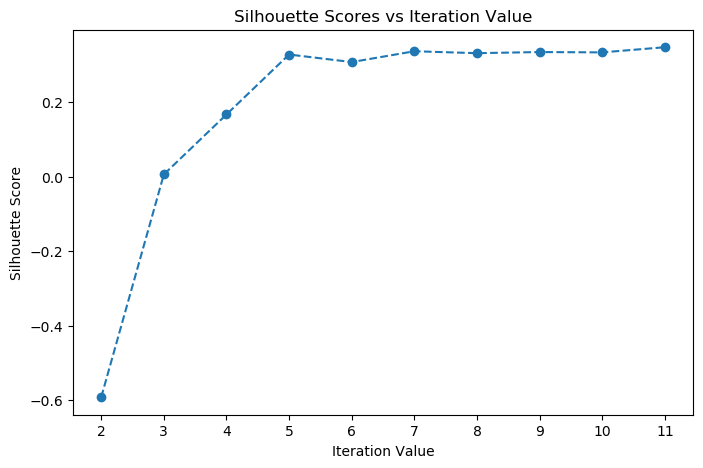

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(iteration_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Iteration Value')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs Iteration Value')
plt.xticks(iteration_values)
plt.show()

## Selecting the best model for the use case

In [21]:
# Using numpy.argmax obtaing based on silhoutte score list the best model (the n_clusters value that produces 
# the highest silhoutte score value)
best_model = best_model = dbscan_clusters[np.argmax(silhouette_scores)]
silhouette_score_index = np.argmax(silhouette_scores)

print(best_model)
print(f'\nSilhoutte Score: {silhouette_scores[silhouette_score_index]}')

DBSCAN(algorithm='auto', eps=1.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=11, n_jobs=None, p=11)

Silhoutte Score: 0.3477054255264682


### <span style='color:blue'>Based on the silhouette score values obtained for each DBSCAN cluster, the best model corresponds to the last one, as its silhouette score is the closest to 1 (the higher the silhouette score the better clustering performance)</span>

# **3. Conclusions**

## Based on your analysis in step 1, choosing  a pair of columns and generating a scatter plot of the data. Using the model predictions to colour the points according to the cluster they belong to

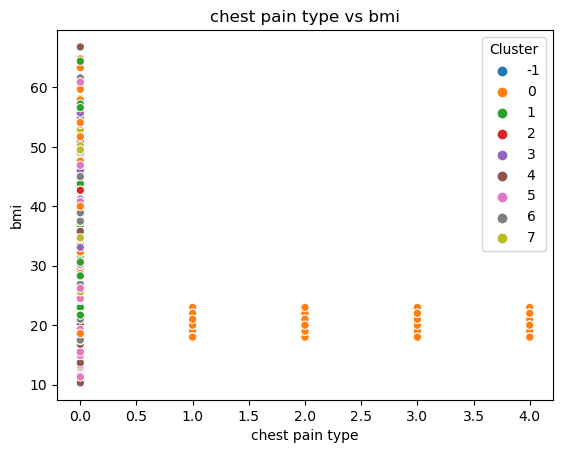

In [22]:
# Using labels_ method within DBSCAN cluster as the hue parameter value to identify to which cluster belongs each
# data point
sns.scatterplot(data['chest pain type'], data['bmi'], hue = best_model.labels_, palette = 'tab10')
plt.title('chest pain type vs bmi')
plt.xlabel('chest pain type')
plt.ylabel('bmi')
plt.legend(title='Cluster', loc='upper right', frameon=True)
plt.show()

### <span style='color:blue'>The scatter plot before shows chest pain type vs bmi, being this pair one of the less correlated features, this scatterplot forms five distinct vertical lines, suggesting that data points cluster around certain values for distinct groups within the dataset (specific chest pain type in this case), having the highest concentration within the first chest pain type.</span>

## Generating a histogram that shows the number of elements in each cluster

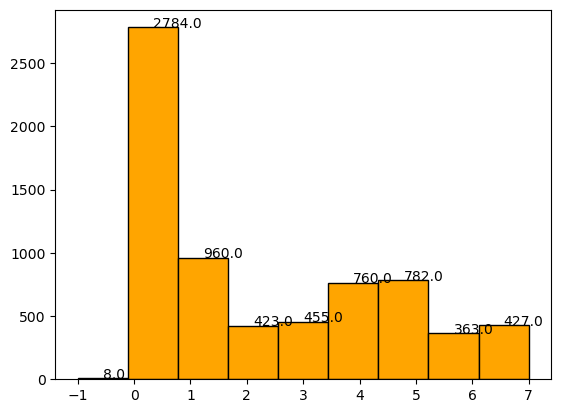

In [23]:
# Using hist() method to make a histogram. To show the count for each bar iterating the patches and calculating
# the mid-values of each patch and height of the patch to place a text.
_, _, patches = plt.hist(best_model.labels_, bins = 9, align="mid", color = 'orange', edgecolor='black')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.5
   plt.text(x, y, pp._y1)
    
plt.show() 

### <span style='color:blue'>The histogram shows a right-skewed distribution. The highest concentration of data points is actually in the second bar (2782 counts), indicating that most data falls within it. The first bar, with only 29 counts, has a much lower frequency, suggesting it represents a less common occurrence.</span>

## Creating a separate dataframe for each cluster

In [24]:
type(best_model.labels_)

numpy.ndarray

In [25]:
# Converting best_model.labels_ (numpy array) to pandas DataFrame and adding it to data
cluster = pd.DataFrame(best_model.labels_, columns = ['cluster'])
data['cluster'] = cluster
data.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin  ...  \
0              0.0           108.0            43.0     92.0  ...   
1              0.0            75.0            47.0     90.0  ...   
2              0.0            98.0            53.0    102.0  ...   
3              1.0            72.0            51.0    118.0  ...   
4              0.0           108.0            90.0     83.0  ...   

   diabetes_pedigree  hypertension  heart_disease  residence_Rural  \
0           0.467386           0.0            0.0                0   
1           0.467386           0.0            0.0                0   
2           0.467386           0.0            0.0                0   
3           0.467386           0.0            0.0                0   
4           0.467386           0.0            0.0                0   

   residence_Urban  smoking_status_Unknown  smoking_status_formerly smoked  \
0                1                       0                               0   
1                1                       0                               0   
2                1                       0                               0   
3                1                       0                               0   
4                1                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  cluster  
0                            1                      0        0  
1                            1                      0        0  
2                            1                      0        0  
3                            1                      0        0  
4                            1                      0        0  

[5 rows x 21 columns]

In [26]:
# Identifying unique labels we have per cluster
unique_labels = np.unique(data['cluster'])
unique_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [27]:
cluster_a = data[data['cluster'] == -1]
cluster_a = cluster_a.drop('cluster', axis = 1)
cluster_a.head()

age  gender  chest pain type  blood pressure  cholesterol  \
2053  80.0     1.0              0.0           138.0        186.0   
2070  76.0     0.0              0.0           111.0        157.0   
2072  81.0     1.0              0.0           129.0        158.0   
2842  61.0     1.0              0.0            93.0        177.0   
3714  53.0     0.0              0.0           139.0        151.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
2053           184.0              0.0          175.29            26.0   
2070           184.0              0.0          116.10            53.0   
2072           142.0              0.0          116.10            39.0   
2842           159.0              0.0          148.24            93.0   
3714           176.0              0.0          196.25            33.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
2053    100.0  31.5           0.467386           1.0            1.0   
2070    129.0  40.0           0.467386           1.0            1.0   
2072    115.0  28.1           0.467386           1.0            1.0   
2842     81.0  32.2           0.467386           1.0            1.0   
3714    125.0  24.9           0.467386           1.0            1.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
2053                0                1                       0   
2070                0                1                       0   
2072                0                1                       0   
2842                1                0                       0   
3714                0                1                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
2053                               1                            0   
2070                               0                            0   
2072                               0                            0   
2842                               1                            0   
3714                               0                            0   

      smoking_status_smokes  
2053                      0  
2070                      1  
2072                      1  
2842                      0  
3714                      1

In [28]:
cluster_b = data[data['cluster'] == 0]
cluster_b = cluster_b.drop('cluster', axis = 1)
cluster_b.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease  residence_Rural  \
0           0.467386           0.0            0.0                0   
1           0.467386           0.0            0.0                0   
2           0.467386           0.0            0.0                0   
3           0.467386           0.0            0.0                0   
4           0.467386           0.0            0.0                0   

   residence_Urban  smoking_status_Unknown  smoking_status_formerly smoked  \
0                1                       0                               0   
1                1                       0                               0   
2                1                       0                               0   
3                1                       0                               0   
4                1                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            1                      0

In [29]:
cluster_c = data[data['cluster'] == 1]
cluster_c = cluster_c.drop('cluster', axis = 1)
cluster_c.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1854  80.0     1.0              0.0           128.0        179.0   
1856  79.0     0.0              0.0            98.0        196.0   
1858  74.0     1.0              0.0           124.0        190.0   
1862  81.0     0.0              0.0            98.0        159.0   
1867  50.0     0.0              0.0           131.0        168.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1854           147.0              0.0          105.92            85.0   
1856           186.0              0.0          174.12            70.0   
1858           158.0              0.0           70.09            59.0   
1862           185.0              0.0           80.43            75.0   
1867           154.0              0.0          167.41            33.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1854    139.0  32.5           0.467386           0.0            1.0   
1856    115.0  24.0           0.467386           1.0            0.0   
1858    111.0  27.4           0.467386           1.0            1.0   
1862    122.0  29.7           0.467386           1.0            0.0   
1867    125.0  30.9           0.467386           1.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1854                1                0                       0   
1856                1                0                       0   
1858                1                0                       0   
1862                1                0                       0   
1867                1                0                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1854                               0                            1   
1856                               0                            1   
1858                               0                            1   
1862                               0                            1   
1867                               0                            1   

      smoking_status_smokes  
1854                      0  
1856                      0  
1858                      0  
1862                      0  
1867                      0

In [30]:
cluster_d = data[data['cluster'] == 2]
cluster_d = cluster_d.drop('cluster', axis = 1)
cluster_d.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1855  49.0     0.0              0.0            80.0        199.0   
1864  54.0     0.0              0.0           110.0        159.0   
1868  64.0     1.0              0.0           117.0        171.0   
1869  75.0     1.0              0.0           133.0        198.0   
1880  69.0     1.0              0.0            93.0        182.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1855           180.0              0.0          171.23            29.0   
1864           170.0              0.0          104.51            89.0   
1868           176.0              0.0          191.61            66.0   
1869           145.0              0.0          191.61            64.0   
1880           182.0              0.0          195.23            56.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1855    111.0  34.4           0.467386           0.0            0.0   
1864     94.0  27.3           0.467386           0.0            0.0   
1868    119.0  37.5           0.467386           0.0            1.0   
1869    105.0  25.8           0.467386           1.0            0.0   
1880    138.0  28.3           0.467386           0.0            1.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1855                0                1                       0   
1864                0                1                       0   
1868                0                1                       0   
1869                0                1                       0   
1880                0                1                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1855                               0                            0   
1864                               0                            0   
1868                               0                            0   
1869                               0                            0   
1880                               0                            0   

      smoking_status_smokes  
1855                      1  
1864                      1  
1868                      1  
1869                      1  
1880                      1

In [31]:
cluster_e = data[data['cluster'] == 3]
cluster_e = cluster_e.drop('cluster', axis = 1)
cluster_e.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1857  81.0     1.0              0.0            95.0        167.0   
1876  71.0     1.0              0.0            80.0        157.0   
1885  80.0     1.0              0.0           127.0        198.0   
1895  63.0     0.0              0.0           137.0        188.0   
1899  58.0     0.0              0.0           133.0        178.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1857           138.0              0.0          186.21            53.0   
1876           152.0              0.0          102.87            92.0   
1885           177.0              0.0          196.92            58.0   
1895           189.0              0.0           90.90            69.0   
1899           172.0              0.0          107.26            84.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1857     90.0  29.0           0.467386           0.0            0.0   
1876    117.0  27.2           0.467386           0.0            0.0   
1885    113.0  30.5           0.467386           0.0            1.0   
1895     82.0  26.4           0.467386           0.0            0.0   
1899    139.0  38.6           0.467386           0.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1857                0                1                       0   
1876                0                1                       0   
1885                0                1                       0   
1895                0                1                       0   
1899                0                1                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1857                               1                            0   
1876                               1                            0   
1885                               1                            0   
1895                               1                            0   
1899                               1                            0   

      smoking_status_smokes  
1857                      0  
1876                      0  
1885                      0  
1895                      0  
1899                      0

In [32]:
cluster_f = data[data['cluster'] == 4]
cluster_f = cluster_f.drop('cluster', axis = 1)
cluster_f.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1860  59.0     0.0              0.0            92.0        163.0   
1875  82.0     1.0              0.0           127.0        163.0   
1879  58.0     1.0              0.0           131.0        157.0   
1883  42.0     1.0              0.0           135.0        167.0   
1890  58.0     1.0              0.0           101.0        176.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1860           178.0              0.0           76.15            55.0   
1875           152.0              0.0          193.94            23.0   
1879           190.0              0.0          189.84            63.0   
1883           156.0              0.0           83.41            25.0   
1890           186.0              0.0           92.62            66.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1860     96.0  22.8           0.467386           0.0            0.0   
1875     97.0  32.5           0.467386           0.0            1.0   
1879    121.0  28.2           0.467386           0.0            0.0   
1883    117.0  25.4           0.467386           0.0            0.0   
1890     88.0  32.0           0.467386           0.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1860                1                0                       1   
1875                1                0                       1   
1879                1                0                       1   
1883                1                0                       1   
1890                1                0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1860                               0                            0   
1875                               0                            0   
1879                               0                            0   
1883                               0                            0   
1890                               0                            0   

      smoking_status_smokes  
1860                      0  
1875                      0  
1879                      0  
1883                      0  
1890                      0

In [33]:
cluster_g = data[data['cluster'] == 5]
cluster_g = cluster_g.drop('cluster', axis = 1)
cluster_g.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1861  78.0     0.0              0.0           139.0        154.0   
1865  78.0     1.0              0.0           139.0        194.0   
1871  57.0     1.0              0.0           116.0        157.0   
1898  75.0     0.0              0.0           100.0        188.0   
1902  76.0     0.0              0.0           104.0        194.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1861           180.0              0.0           58.57            82.0   
1865           157.0              0.0          104.51            61.0   
1871           182.0              0.0           89.22            36.0   
1898           152.0              0.0          109.78            50.0   
1902           173.0              0.0           89.96            82.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1861    118.0  24.2           0.467386           0.0            0.0   
1865     93.0  27.3           0.467386           0.0            1.0   
1871    104.0  37.8           0.467386           0.0            1.0   
1898    133.0  33.6           0.467386           0.0            1.0   
1902     87.0  39.2           0.467386           0.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1861                0                1                       1   
1865                0                1                       1   
1871                0                1                       1   
1898                0                1                       1   
1902                0                1                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1861                               0                            0   
1865                               0                            0   
1871                               0                            0   
1898                               0                            0   
1902                               0                            0   

      smoking_status_smokes  
1861                      0  
1865                      0  
1871                      0  
1898                      0  
1902                      0

In [34]:
cluster_h = data[data['cluster'] == 6]
cluster_h = cluster_h.drop('cluster', axis = 1)
cluster_h.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1863  61.0     0.0              0.0           134.0        152.0   
1872  71.0     0.0              0.0           136.0        161.0   
1901  81.0     0.0              0.0           105.0        174.0   
1914  67.0     0.0              0.0           105.0        182.0   
1937  54.0     1.0              0.0            82.0        177.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1863           171.0              0.0          120.46            67.0   
1872           156.0              0.0          193.94            32.0   
1901           152.0              0.0           58.09            21.0   
1914           165.0              0.0           61.94            85.0   
1937           175.0              0.0           96.97            39.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1863    119.0  36.8           0.467386           0.0            1.0   
1872     94.0  22.4           0.467386           0.0            0.0   
1901    112.0  39.2           0.467386           1.0            0.0   
1914     97.0  25.3           0.467386           1.0            0.0   
1937    134.0  29.1           0.467386           0.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1863                1                0                       0   
1872                1                0                       0   
1901                1                0                       0   
1914                1                0                       0   
1937                1                0                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1863                               0                            0   
1872                               0                            0   
1901                               0                            0   
1914                               0                            0   
1937                               0                            0   

      smoking_status_smokes  
1863                      1  
1872                      1  
1901                      1  
1914                      1  
1937                      1

In [35]:
cluster_i = data[data['cluster'] == 7]
cluster_i = cluster_i.drop('cluster', axis = 1)
cluster_i.head()

age  gender  chest pain type  blood pressure  cholesterol  \
1878  65.0     0.0              0.0            93.0        198.0   
1881  59.0     1.0              0.0           101.0        178.0   
1887  82.0     0.0              0.0           119.0        158.0   
1888  74.0     1.0              0.0           106.0        186.0   
1889  72.0     0.0              0.0            89.0        194.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
1878           177.0              0.0          100.98            54.0   
1881           145.0              0.0          195.23            32.0   
1887           158.0              0.0           84.03            74.0   
1888           176.0              0.0           84.03            27.0   
1889           142.0              0.0           74.63            90.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
1878     81.0  28.2           0.467386           0.0            0.0   
1881    132.0  28.3           0.467386           0.0            0.0   
1887     89.0  26.5           0.467386           1.0            1.0   
1888     99.0  33.7           0.467386           0.0            0.0   
1889    114.0  23.1           0.467386           1.0            0.0   

      residence_Rural  residence_Urban  smoking_status_Unknown  \
1878                1                0                       0   
1881                1                0                       0   
1887                1                0                       0   
1888                1                0                       0   
1889                1                0                       0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
1878                               1                            0   
1881                               1                            0   
1887                               1                            0   
1888                               1                            0   
1889                               1                            0   

      smoking_status_smokes  
1878                      0  
1881                      0  
1887                      0  
1888                      0  
1889                      0

### <span style='color:blue'>So, the clusters will be as follow:</span>
### * cluster_a = -1
### * cluster_b = 0
### * cluster_c = 1
### * cluster_d = 2
### * cluster_e = 3
### * cluster_f = 4
### * cluster_g = 5
### * cluster_h = 6
### * cluster_i = 7

## Describing each cluster using pandas.describe()

In [36]:
cluster_a.describe()

age    gender  chest pain type  blood pressure  cholesterol  \
count   8.00000  8.000000              8.0        8.000000     8.000000   
mean   66.87500  0.625000              0.0      121.875000   171.375000   
std    14.23715  0.517549              0.0       16.199096    18.531344   
min    41.00000  0.000000              0.0       93.000000   151.000000   
25%    59.00000  0.000000              0.0      110.250000   156.250000   
50%    71.50000  1.000000              0.0      128.500000   167.500000   
75%    77.00000  1.000000              0.0      131.250000   187.000000   
max    81.00000  1.000000              0.0      139.000000   198.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count         8.00000              8.0        8.000000        8.000000   
mean        163.62500              0.0      140.393750       59.000000   
std          19.04084              0.0       43.976606       26.806183   
min         141.00000              0.0       84.310000       26.000000   
25%         144.25000              0.0      110.692500       37.500000   
50%         167.50000              0.0      132.170000       53.000000   
75%         179.50000              0.0      179.565000       86.250000   
max         184.00000              0.0      196.250000       93.000000   

          insulin        bmi  diabetes_pedigree  hypertension  heart_disease  \
count    8.000000   8.000000           8.000000           8.0            8.0   
mean   107.500000  33.012500           0.467386           1.0            1.0   
std     21.527391   6.147807           0.000000           0.0            0.0   
min     81.000000  24.900000           0.467386           1.0            1.0   
25%     88.000000  30.275000           0.467386           1.0            1.0   
50%    107.500000  31.850000           0.467386           1.0            1.0   
75%    126.000000  34.375000           0.467386           1.0            1.0   
max    136.000000  43.900000           0.467386           1.0            1.0   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count         8.000000         8.000000                 8.00000   
mean          0.375000         0.625000                 0.25000   
std           0.517549         0.517549                 0.46291   
min           0.000000         0.000000                 0.00000   
25%           0.000000         0.000000                 0.00000   
50%           0.000000         1.000000                 0.00000   
75%           1.000000         1.000000                 0.25000   
max           1.000000         1.000000                 1.00000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                         8.00000                     8.000000   
mean                          0.25000                     0.125000   
std                           0.46291                     0.353553   
min                           0.00000                     0.000000   
25%                           0.00000                     0.000000   
50%                           0.00000                     0.000000   
75%                           0.25000                     0.000000   
max                           1.00000                     1.000000   

       smoking_status_smokes  
count               8.000000  
mean                0.375000  
std                 0.517549  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [37]:
cluster_b.describe()

age       gender  chest pain type  blood pressure  cholesterol  \
count  2784.000000  2784.000000      2784.000000     2784.000000  2784.000000   
mean     54.511135     0.682830         1.322917      109.094828   200.117816   
std      10.743166     0.465458         1.697443       26.549941    43.013361   
min      28.000000     0.000000         0.000000       60.000000   150.000000   
25%      46.000000     0.000000         0.000000       85.000000   170.000000   
50%      54.000000     1.000000         0.000000      112.500000   186.000000   
75%      61.000000     1.000000         3.000000      130.000000   218.250000   
max      82.000000     1.000000         4.000000      165.000000   294.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count     2784.000000      2784.000000     2784.000000     2784.000000   
mean       161.536279         0.154454      102.835614       52.455460   
std         15.165234         0.361448       27.638976       22.890422   
min        138.000000         0.000000       55.220000       21.000000   
25%        148.000000         0.000000       83.000000       32.000000   
50%        160.000000         0.000000       99.000000       47.000000   
75%        174.000000         0.000000      116.000000       73.000000   
max        202.000000         1.000000      199.000000       99.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  2784.000000  2784.000000        2784.000000   2784.000000   
mean    111.809986    25.069181           0.467386      0.036279   
std      18.242099     6.259837           0.162366      0.187016   
min      81.000000    14.100000           0.078000      0.000000   
25%      97.000000    21.000000           0.467386      0.000000   
50%     111.000000    23.000000           0.467386      0.000000   
75%     125.000000    28.000000           0.467386      0.000000   
max     171.000000    64.800000           2.420000      1.000000   

       heart_disease  residence_Rural  residence_Urban  \
count    2784.000000           2784.0           2784.0   
mean        0.016164              0.0              1.0   
std         0.126128              0.0              0.0   
min         0.000000              0.0              1.0   
25%         0.000000              0.0              1.0   
50%         0.000000              0.0              1.0   
75%         0.000000              0.0              1.0   
max         1.000000              0.0              1.0   

       smoking_status_Unknown  smoking_status_formerly smoked  \
count                  2784.0                          2784.0   
mean                      0.0                             0.0   
std                       0.0                             0.0   
min                       0.0                             0.0   
25%                       0.0                             0.0   
50%                       0.0                             0.0   
75%                       0.0                             0.0   
max                       0.0                             0.0   

       smoking_status_never smoked  smoking_status_smokes  
count                       2784.0                 2784.0  
mean                           1.0                    0.0  
std                            0.0                    0.0  
min                            1.0                    0.0  
25%                            1.0                    0.0  
50%                            1.0                    0.0  
75%                            1.0                    0.0  
max                            1.0                    0.0

In [38]:
cluster_c.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  960.000000  960.000000            960.0      960.000000   960.000000   
mean    59.627083    0.364583              0.0      109.996875   174.417708   
std     12.542171    0.481564              0.0       17.273093    14.271664   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.000000    0.000000              0.0       95.000000   162.000000   
50%     58.000000    0.000000              0.0      111.000000   174.000000   
75%     70.000000    1.000000              0.0      125.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      960.000000            960.0      960.000000      960.000000   
mean       165.355208              0.0       96.265906       59.860417   
std         15.345173              0.0       29.778836       22.196236   
min        138.000000              0.0       55.120000       21.000000   
25%        152.000000              0.0       75.880000       41.000000   
50%        165.000000              0.0       90.775000       61.000000   
75%        179.000000              0.0      107.982500       79.000000   
max        191.000000              0.0      198.240000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  960.000000  960.000000       9.600000e+02    960.000000     960.000000   
mean   110.997917   29.688750       4.673860e-01      0.135417       0.045833   
std     16.846358    7.020629       2.221603e-16      0.342346       0.209233   
min     81.000000   11.500000       4.673860e-01      0.000000       0.000000   
25%     97.000000   24.975000       4.673860e-01      0.000000       0.000000   
50%    111.000000   28.600000       4.673860e-01      0.000000       0.000000   
75%    126.000000   33.200000       4.673860e-01      0.000000       0.000000   
max    139.000000   64.400000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            960.0            960.0                   960.0   
mean               1.0              0.0                     0.0   
std                0.0              0.0                     0.0   
min                1.0              0.0                     0.0   
25%                1.0              0.0                     0.0   
50%                1.0              0.0                     0.0   
75%                1.0              0.0                     0.0   
max                1.0              0.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           960.0                        960.0   
mean                              0.0                          1.0   
std                               0.0                          0.0   
min                               0.0                          1.0   
25%                               0.0                          1.0   
50%                               0.0                          1.0   
75%                               0.0                          1.0   
max                               0.0                          1.0   

       smoking_status_smokes  
count                  960.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [39]:
cluster_d.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  423.000000  423.000000            423.0      423.000000   423.000000   
mean    57.536643    0.430260              0.0      109.241135   172.888889   
std     11.601722    0.495699              0.0       17.517858    14.849464   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     48.000000    0.000000              0.0       93.000000   159.500000   
50%     55.000000    0.000000              0.0      110.000000   172.000000   
75%     66.000000    1.000000              0.0      125.000000   185.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      423.000000            423.0      423.000000      423.000000   
mean       164.881797              0.0       95.545414       59.981087   
std         15.880783              0.0       29.681709       22.567637   
min        138.000000              0.0       55.320000       21.000000   
25%        150.000000              0.0       74.830000       40.500000   
50%        166.000000              0.0       89.700000       61.000000   
75%        179.000000              0.0      107.345000       80.000000   
max        191.000000              0.0      198.360000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  423.000000  423.000000       4.230000e+02    423.000000     423.000000   
mean   109.669031   30.057683       4.673860e-01      0.113475       0.073286   
std     16.828777    6.566306       1.667307e-16      0.317548       0.260914   
min     81.000000   15.700000       4.673860e-01      0.000000       0.000000   
25%     95.000000   25.200000       4.673860e-01      0.000000       0.000000   
50%    110.000000   28.900000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.700000       4.673860e-01      0.000000       0.000000   
max    139.000000   52.700000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            423.0            423.0                   423.0   
mean               0.0              1.0                     0.0   
std                0.0              0.0                     0.0   
min                0.0              1.0                     0.0   
25%                0.0              1.0                     0.0   
50%                0.0              1.0                     0.0   
75%                0.0              1.0                     0.0   
max                0.0              1.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           423.0                        423.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  
count                  423.0  
mean                     1.0  
std                      0.0  
min                      1.0  
25%                      1.0  
50%                      1.0  
75%                      1.0  
max                      1.0

In [40]:
cluster_e.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  455.000000  455.000000            455.0      455.000000   455.000000   
mean    61.832967    0.450549              0.0      111.024176   174.017582   
std     12.113569    0.498096              0.0       17.390991    14.619691   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     52.000000    0.000000              0.0       96.000000   161.000000   
50%     61.000000    0.000000              0.0      112.000000   174.000000   
75%     72.000000    1.000000              0.0      127.000000   186.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      455.000000            455.0      455.000000      455.000000   
mean       164.349451              0.0       96.238044       58.936264   
std         15.615382              0.0       30.629519       22.614620   
min        138.000000              0.0       55.610000       21.000000   
25%        151.000000              0.0       75.650000       39.000000   
50%        164.000000              0.0       89.180000       57.000000   
75%        178.000000              0.0      106.575000       78.000000   
max        191.000000              0.0      198.320000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  455.000000  455.000000       4.550000e+02    455.000000     455.000000   
mean   110.828571   30.459780       4.673860e-01      0.149451       0.090110   
std     17.001725    7.072453       1.667168e-16      0.356924       0.286654   
min     81.000000   15.000000       4.673860e-01      0.000000       0.000000   
25%     97.000000   25.750000       4.673860e-01      0.000000       0.000000   
50%    112.000000   29.300000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.400000       4.673860e-01      0.000000       0.000000   
max    139.000000   55.700000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            455.0            455.0                   455.0   
mean               0.0              1.0                     0.0   
std                0.0              0.0                     0.0   
min                0.0              1.0                     0.0   
25%                0.0              1.0                     0.0   
50%                0.0              1.0                     0.0   
75%                0.0              1.0                     0.0   
max                0.0              1.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           455.0                        455.0   
mean                              1.0                          0.0   
std                               0.0                          0.0   
min                               1.0                          0.0   
25%                               1.0                          0.0   
50%                               1.0                          0.0   
75%                               1.0                          0.0   
max                               1.0                          0.0   

       smoking_status_smokes  
count                  455.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [41]:
cluster_f.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  760.000000  760.000000            760.0      760.000000   760.000000   
mean    58.519737    0.451316              0.0      110.506579   175.303947   
std     12.208752    0.497952              0.0       17.372535    14.899611   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     48.000000    0.000000              0.0       96.000000   162.000000   
50%     57.000000    0.000000              0.0      110.000000   176.000000   
75%     68.000000    1.000000              0.0      126.000000   189.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      760.000000            760.0      760.000000      760.000000   
mean       164.805263              0.0       94.319276       60.075000   
std         15.384110              0.0       27.214000       22.340423   
min        138.000000              0.0       55.230000       21.000000   
25%        152.000000              0.0       76.120000       41.750000   
50%        165.500000              0.0       89.780000       60.000000   
75%        178.000000              0.0      108.252500       78.000000   
max        191.000000              0.0      197.790000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  760.000000  760.000000       7.600000e+02    760.000000     760.000000   
mean   110.332895   25.639868       4.673860e-01      0.032895       0.035526   
std     17.191734    7.798760       1.666431e-16      0.178479       0.185228   
min     81.000000   10.300000       4.673860e-01      0.000000       0.000000   
25%     95.750000   19.500000       4.673860e-01      0.000000       0.000000   
50%    111.000000   24.400000       4.673860e-01      0.000000       0.000000   
75%    126.000000   29.825000       4.673860e-01      0.000000       0.000000   
max    139.000000   66.800000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            760.0            760.0                   760.0   
mean               1.0              0.0                     1.0   
std                0.0              0.0                     0.0   
min                1.0              0.0                     1.0   
25%                1.0              0.0                     1.0   
50%                1.0              0.0                     1.0   
75%                1.0              0.0                     1.0   
max                1.0              0.0                     1.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           760.0                        760.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  
count                  760.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [42]:
cluster_g.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  782.000000  782.000000            782.0      782.000000   782.000000   
mean    59.488491    0.465473              0.0      108.849105   174.283887   
std     12.427583    0.499126              0.0       17.383090    14.384467   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.250000    0.000000              0.0       93.000000   162.000000   
50%     58.000000    0.000000              0.0      110.000000   174.000000   
75%     70.000000    1.000000              0.0      124.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      782.000000            782.0      782.000000      782.000000   
mean       164.592072              0.0       94.123964       59.106138   
std         15.801946              0.0       26.364913       21.848336   
min        138.000000              0.0       55.280000       21.000000   
25%        151.250000              0.0       76.652500       40.000000   
50%        164.000000              0.0       88.280000       59.000000   
75%        179.000000              0.0      105.765000       77.000000   
max        191.000000              0.0      198.020000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  782.000000  782.000000       7.820000e+02    782.000000     782.000000   
mean   111.130435   25.952685       4.673860e-01      0.031969       0.024297   
std     16.934108    8.105359       1.110934e-16      0.176031       0.154067   
min     81.000000   11.300000       4.673860e-01      0.000000       0.000000   
25%     96.000000   19.600000       4.673860e-01      0.000000       0.000000   
50%    112.000000   24.750000       4.673860e-01      0.000000       0.000000   
75%    126.000000   31.000000       4.673860e-01      0.000000       0.000000   
max    139.000000   61.200000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            782.0            782.0                   782.0   
mean               0.0              1.0                     1.0   
std                0.0              0.0                     0.0   
min                0.0              1.0                     1.0   
25%                0.0              1.0                     1.0   
50%                0.0              1.0                     1.0   
75%                0.0              1.0                     1.0   
max                0.0              1.0                     1.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           782.0                        782.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  
count                  782.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [43]:
cluster_h.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  363.000000  363.000000            363.0      363.000000   363.000000   
mean    58.079890    0.424242              0.0      111.506887   175.402204   
std     11.564458    0.494910              0.0       17.747829    14.038943   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.000000    0.000000              0.0       94.000000   163.000000   
50%     57.000000    0.000000              0.0      113.000000   175.000000   
75%     66.000000    1.000000              0.0      126.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      363.000000            363.0      363.000000      363.000000   
mean       165.710744              0.0       96.298485       59.438017   
std         15.141381              0.0       28.554712       22.677742   
min        138.000000              0.0       55.930000       21.000000   
25%        153.000000              0.0       76.380000       39.000000   
50%        166.000000              0.0       91.630000       62.000000   
75%        178.000000              0.0      107.085000       79.000000   
max        191.000000              0.0      198.790000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  363.000000  363.000000       3.630000e+02    363.000000     363.000000   
mean   110.457300   30.767493       4.673860e-01      0.118457       0.074380   
std     16.725117    7.626936       5.558777e-17      0.323595       0.262751   
min     81.000000   15.800000       4.673860e-01      0.000000       0.000000   
25%     96.500000   25.600000       4.673860e-01      0.000000       0.000000   
50%    110.000000   29.400000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.100000       4.673860e-01      0.000000       0.000000   
max    139.000000   61.600000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            363.0            363.0                   363.0   
mean               1.0              0.0                     0.0   
std                0.0              0.0                     0.0   
min                1.0              0.0                     0.0   
25%                1.0              0.0                     0.0   
50%                1.0              0.0                     0.0   
75%                1.0              0.0                     0.0   
max                1.0              0.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           363.0                        363.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  
count                  363.0  
mean                     1.0  
std                      0.0  
min                      1.0  
25%                      1.0  
50%                      1.0  
75%                      1.0  
max                      1.0

In [44]:
cluster_i.describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  427.000000  427.000000            427.0      427.000000   427.000000   
mean    60.611241    0.468384              0.0      109.238876   174.515222   
std     11.958797    0.499585              0.0       17.271760    14.632000   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     51.000000    0.000000              0.0       95.000000   161.500000   
50%     60.000000    0.000000              0.0      108.000000   174.000000   
75%     70.000000    1.000000              0.0      124.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      427.000000            427.0      427.000000      427.000000   
mean       163.693208              0.0       95.410468       60.700234   
std         15.405841              0.0       30.413967       23.593269   
min        138.000000              0.0       55.270000       21.000000   
25%        151.000000              0.0       76.310000       40.000000   
50%        163.000000              0.0       88.660000       64.000000   
75%        177.000000              0.0      106.525000       82.000000   
max        191.000000              0.0      198.840000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  427.000000  427.000000       4.270000e+02    427.000000     427.000000   
mean   110.194379   30.964169       4.673860e-01      0.117096       0.077283   
std     16.736768    6.931632       1.111525e-16      0.321912       0.267354   
min     81.000000   17.000000       4.673860e-01      0.000000       0.000000   
25%     96.000000   26.200000       4.673860e-01      0.000000       0.000000   
50%    110.000000   30.200000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.500000       4.673860e-01      0.000000       0.000000   
max    139.000000   56.100000       4.673860e-01      1.000000       1.000000   

       residence_Rural  residence_Urban  smoking_status_Unknown  \
count            427.0            427.0                   427.0   
mean               1.0              0.0                     0.0   
std                0.0              0.0                     0.0   
min                1.0              0.0                     0.0   
25%                1.0              0.0                     0.0   
50%                1.0              0.0                     0.0   
75%                1.0              0.0                     0.0   
max                1.0              0.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           427.0                        427.0   
mean                              1.0                          0.0   
std                               0.0                          0.0   
min                               1.0                          0.0   
25%                               1.0                          0.0   
50%                               1.0                          0.0   
75%                               1.0                          0.0   
max                               1.0                          0.0   

       smoking_status_smokes  
count                  427.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [45]:
# Grouping by cluster, the sorted values in ascending order considered the gdpp (listing the top 5)
# gdpp was used based on that the GPD provides information about the size of the economy and how an economy
# is performing in each country, being worlwide rankings available.
data.sort_values(by = ['blood pressure', 'max heart rate', 'age', 'exercise angina', 'chest pain type'], \
                 ascending = False).groupby('cluster').head(3)

age  gender  chest pain type  blood pressure  cholesterol  \
690   57.0     1.0              4.0           165.0        294.0   
990   57.0     1.0              4.0           165.0        294.0   
383   52.0     1.0              4.0           165.0        182.0   
6575  78.0     0.0              0.0           139.0        193.0   
6416  52.0     0.0              0.0           139.0        152.0   
6790  62.0     0.0              0.0           139.0        151.0   
3446  61.0     1.0              0.0           139.0        164.0   
5931  51.0     0.0              0.0           139.0        159.0   
2088  57.0     1.0              0.0           139.0        166.0   
6335  78.0     0.0              0.0           139.0        192.0   
3330  80.0     1.0              0.0           139.0        155.0   
2162  43.0     0.0              0.0           139.0        171.0   
4519  66.0     1.0              0.0           139.0        153.0   
4028  58.0     0.0              0.0           139.0        167.0   
2227  56.0     1.0              0.0           139.0        188.0   
4961  43.0     0.0              0.0           139.0        190.0   
3844  64.0     1.0              0.0           139.0        198.0   
5420  40.0     1.0              0.0           139.0        191.0   
3714  53.0     0.0              0.0           139.0        151.0   
3644  54.0     0.0              0.0           139.0        190.0   
6095  40.0     1.0              0.0           139.0        172.0   
2359  71.0     0.0              0.0           139.0        170.0   
2962  44.0     0.0              0.0           139.0        181.0   
6387  45.0     1.0              0.0           139.0        179.0   
3620  62.0     0.0              0.0           139.0        179.0   
2053  80.0     1.0              0.0           138.0        186.0   
4719  68.0     0.0              0.0           129.0        198.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
690            163.0              0.0          116.00            41.0   
990            152.0              0.0          112.00            77.0   
383            143.0              1.0           89.00            32.0   
6575           191.0              0.0          114.54            52.0   
6416           191.0              0.0           83.84            45.0   
6790           190.0              0.0           74.12            89.0   
3446           190.0              0.0           89.75            60.0   
5931           189.0              0.0           82.59            82.0   
2088           188.0              0.0           86.30            60.0   
6335           187.0              0.0          100.54            76.0   
3330           186.0              0.0          102.34            73.0   
2162           186.0              0.0          115.22            70.0   
4519           185.0              0.0           70.93            89.0   
4028           184.0              0.0          158.48            35.0   
2227           184.0              0.0           73.02            71.0   
4961           180.0              0.0          104.55            26.0   
3844           178.0              0.0          103.28            95.0   
5420           178.0              0.0           88.18            26.0   
3714           176.0              0.0          196.25            33.0   
3644           175.0              0.0           72.06            82.0   
6095           173.0              0.0           69.45            44.0   
2359           168.0              0.0          100.61            71.0   
2962           166.0              0.0           90.40            58.0   
6387           161.0              0.0           69.20            31.0   
3620           147.0              0.0           66.29            83.0   
2053           184.0              0.0          175.29            26.0   
4719           178.0              0.0          192.39            85.0   

      insulin  ...  diabetes_pedigree  hypertension  hear

In [46]:
# Assigning the result of the sorting operation to sorted_data
sorted_data = data.sort_values(by=['exercise angina', 'chest pain type', 'blood pressure', 'max heart rate', 'age'], \
                               ascending = False)
# Selecting the top 3 entries after grouping sorted_data by cluster
top_entries = sorted_data.groupby('cluster').head(3)
top_entries

age  gender  chest pain type  blood pressure  cholesterol  \
383   52.0     1.0              4.0           165.0        182.0   
68    52.0     1.0              4.0           160.0        246.0   
532   75.0     1.0              4.0           160.0        294.0   
6575  78.0     0.0              0.0           139.0        193.0   
6416  52.0     0.0              0.0           139.0        152.0   
6790  62.0     0.0              0.0           139.0        151.0   
3446  61.0     1.0              0.0           139.0        164.0   
5931  51.0     0.0              0.0           139.0        159.0   
2088  57.0     1.0              0.0           139.0        166.0   
6335  78.0     0.0              0.0           139.0        192.0   
3330  80.0     1.0              0.0           139.0        155.0   
2162  43.0     0.0              0.0           139.0        171.0   
4519  66.0     1.0              0.0           139.0        153.0   
4028  58.0     0.0              0.0           139.0        167.0   
2227  56.0     1.0              0.0           139.0        188.0   
4961  43.0     0.0              0.0           139.0        190.0   
3844  64.0     1.0              0.0           139.0        198.0   
5420  40.0     1.0              0.0           139.0        191.0   
3714  53.0     0.0              0.0           139.0        151.0   
3644  54.0     0.0              0.0           139.0        190.0   
6095  40.0     1.0              0.0           139.0        172.0   
2359  71.0     0.0              0.0           139.0        170.0   
2962  44.0     0.0              0.0           139.0        181.0   
6387  45.0     1.0              0.0           139.0        179.0   
3620  62.0     0.0              0.0           139.0        179.0   
2053  80.0     1.0              0.0           138.0        186.0   
4719  68.0     0.0              0.0           129.0        198.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
383            143.0              1.0           89.00            32.0   
68             184.0              1.0           98.00            71.0   
532            160.0              1.0          116.00            25.0   
6575           191.0              0.0          114.54            52.0   
6416           191.0              0.0           83.84            45.0   
6790           190.0              0.0           74.12            89.0   
3446           190.0              0.0           89.75            60.0   
5931           189.0              0.0           82.59            82.0   
2088           188.0              0.0           86.30            60.0   
6335           187.0              0.0          100.54            76.0   
3330           186.0              0.0          102.34            73.0   
2162           186.0              0.0          115.22            70.0   
4519           185.0              0.0           70.93            89.0   
4028           184.0              0.0          158.48            35.0   
2227           184.0              0.0           73.02            71.0   
4961           180.0              0.0          104.55            26.0   
3844           178.0              0.0          103.28            95.0   
5420           178.0              0.0           88.18            26.0   
3714           176.0              0.0          196.25            33.0   
3644           175.0              0.0           72.06            82.0   
6095           173.0              0.0           69.45            44.0   
2359           168.0              0.0          100.61            71.0   
2962           166.0              0.0           90.40            58.0   
6387           161.0              0.0           69.20            31.0   
3620           147.0              0.0           66.29            83.0   
2053           184.0              0.0          175.29            26.0   
4719           178.0              0.0          192.39            85.0   

      insulin  ...  diabetes_pedigree  hypertension  hear

### <span style='color:blue'>According <a href='https://www.nshealth.ca/sites/default/files/documents/Understanding%20Triage%20poster.pdf'>Nova Scotia Health</a> When a person arrives at the emergency room (ER), the first step is for a triage paramedic or nurse to conduct an initial assessment. This involves asking questions about the patient's reason for visiting, existing health conditions, and any medications they may be taking—if the patient is conscious or accompanied. Following this, vital signs are measured, including breathing rate, pulse, blood pressure, and temperature. This initial evaluation helps determine the urgency of the patient’s condition and guides subsequent treatment decisions.</span>
    
### <span style='color:blue'>Knowing this, we decided to sort the data in descending order based on values for exercise angina, chest pain type, blood pressure, max heart rate, and age (the last one is important because age is often connected to comorbidities).</span>
    
### <span style='color:blue'>Therefore, the level urgency rank will be:</div>
   
### 1. <span style='color:blue'>cluster_b</span>
### 2. <span style='color:blue'>cluster_h</span>
### 3. <span style='color:blue'>cluster_g</span> 
### 4. <span style='color:blue'>cluster_e</span>    
### 5. <span style='color:blue'>cluster_c</span>
### 6. <span style='color:blue'>cluster_f</span>
### 7. <span style='color:blue'>cluster_d</span>
### 8. <span style='color:blue'>cluster_a</span>
### 9. <span style='color:blue'>cluster_i</span> 